In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading the data
data = pd.read_csv('/content/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Cheacking Null values
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Removing the unwanted columns
# Cabin more than half is Null , PassengerId,Name, and Ticket won't help in prediction
data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# Removing Null rows
data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder to Change String to Number 0,1,2,....
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
  data[col] = le.fit_transform(data[col]) # Sex = (0 = Female), and (1 = Male). And Embarked (0 = S), (1 = C), (2 = Q)

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: >

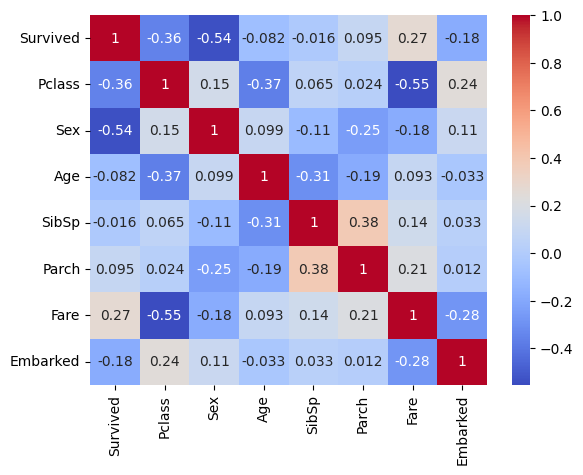

In [ ]:
import seaborn as sns

# Heat map to see the correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Features
X = data.drop('Survived', axis=1)
# Target
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
nb = GaussianNB()
nb.fit(X_train, y_train)

# Testing
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", "{:.2f}".format(accuracy*100),"%")

Accuracy: 76.22 %


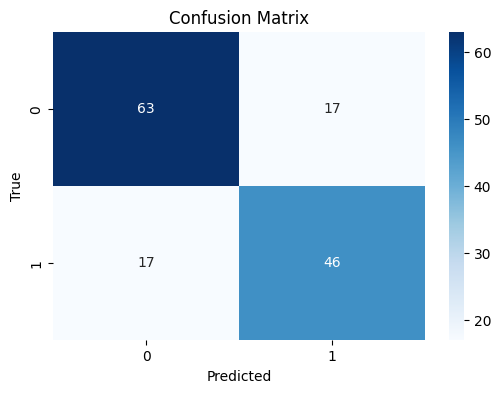

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        80
           1       0.73      0.73      0.73        63

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Sample Data
sample_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],  # 1 for male, 0 for female
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [2]  # 0 for S, 1 for C, 2 for Q
})

# Prediction the sample
sample_prediction = nb.predict(sample_data)

print("Prediction:", sample_prediction)  # 0 for not survived, 1 for survived


Prediction: [0]
